In [1]:
!pip install pandas_datareader

In [2]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Input Symbol from Yahoo finance

In [3]:
Symbol = "AUDUSD=X"

In [4]:
s1 = datetime.now() - timedelta(365)
s2 = datetime.now() - timedelta(1)

start_date = "{0}-{1}-{2}".format(s1.day, s1.month, s1.year)
end_date = "{0}-{1}-{2}".format(s2.day, s2.month, s2.year)

DF = web.get_data_yahoo(Symbol,start=start_date,end=end_date)

DF1 = DF[["Adj Close"]]
DF1["Mean35"] = DF.rolling(35).mean()[["Adj Close"]]
DF1["Dif"] = abs(DF1["Adj Close"]-DF1['Mean35'])
mean_dif = DF1["Dif"].mean()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
if DF1.loc[end_date]["Dif"] < mean_dif*3 :
    print("Yesterday trend is still going")
else :
    print("Check Price and Check your port")

Yesterday trend is still going


 ## Show days thar Different in price and Moving average more than 3 time mean

In [6]:
DF1[DF1["Dif"] > mean_dif*3]

,Adj Close,Mean35,Dif
Date,,,
2020-03-18,0.599220,0.658815,0.059595
2020-03-19,0.580980,0.656123,0.075143
2020-03-20,0.574290,0.653364,0.079074
2020-03-23,0.575331,0.650678,0.075347
2020-03-24,0.587660,0.648352,0.060692
2020-03-26,0.590810,0.643781,0.052971


## Price higher or lower than mean

In [7]:
DFtotal = DF.merge(DF1, on = "Date")
DFtotal.drop(columns = ["Adj Close_y"], inplace = True)

### Price higher than mean

In [8]:
DFtotal[DFtotal["Adj Close_x"]>DFtotal["Mean35"]]

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif
Date,,,,,,,,
2020-04-09,0.637000,0.631460,0.633500,0.633260,0,0.633260,0.626262,0.006998
2020-04-12,0.638529,0.633210,0.633931,0.633521,0,0.633521,0.625486,0.008035
2020-04-13,0.643261,0.637662,0.639810,0.640111,0,0.640111,0.624883,0.015228
2020-04-14,0.643459,0.628540,0.643376,0.643430,0,0.643430,0.624395,0.019035
2020-04-15,0.633200,0.626649,0.630900,0.630890,0,0.630890,0.623716,0.007174
...,...,...,...,...,...,...,...,...
2021-01-13,0.778271,0.772310,0.777480,0.777605,0,0.777605,0.756593,0.021012
2021-01-14,0.779310,0.772880,0.774640,0.774713,0,0.774713,0.757686,0.017028
2021-01-15,0.778880,0.768250,0.777563,0.777580,0,0.777580,0.758879,0.018701


### price locer than mean

In [9]:
DFtotal[DFtotal["Adj Close_x"]<DFtotal["Mean35"]]

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif
Date,,,,,,,,
2020-03-06,0.665823,0.658610,0.661831,0.661551,0,0.661551,0.669907,0.008356
2020-03-09,0.668350,0.633590,0.661424,0.661358,0,0.661358,0.669141,0.007783
2020-03-10,0.660500,0.647429,0.660060,0.659800,0,0.659800,0.668345,0.008545
2020-03-11,0.653950,0.648959,0.649570,0.649910,0,0.649910,0.667352,0.017442
2020-03-12,0.648100,0.626999,0.647850,0.647940,0,0.647940,0.666313,0.018373
2020-03-13,0.632310,0.615400,0.628210,0.627412,0,0.627412,0.664697,0.037285
2020-03-16,0.618912,0.608140,0.617871,0.617768,0,0.617768,0.662913,0.045145
2020-03-17,0.614800,0.596080,0.610450,0.609942,0,0.609942,0.661021,0.051079
2020-03-18,0.602678,0.581791,0.598830,0.599220,0,0.599220,0.658815,0.059595


## Check condition is higher or lower

In [10]:
if DFtotal.loc[end_date]["Close"] < DFtotal.loc[end_date]["Mean35"]  :
    print("Today price is lower than mean")
else :
    print("Today price is higher than mean")

Today price is higher than mean


In [18]:
df_sort = DFtotal.sort_values(by = "Dif", ascending = False)
df_sort.dropna(inplace =True, axis = 0)
df_sort

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif
Date,,,,,,,,
2020-03-20,0.597850,0.571177,0.574640,0.574290,0,0.574290,0.653364,0.079074
2020-03-23,0.584020,0.570210,0.575526,0.575331,0,0.575331,0.650678,0.075347
2020-03-19,0.596240,0.552000,0.579950,0.580980,0,0.580980,0.656123,0.075143
2020-03-24,0.597410,0.586889,0.587630,0.587660,0,0.587660,0.648352,0.060692
2020-03-18,0.602678,0.581791,0.598830,0.599220,0,0.599220,0.658815,0.059595
...,...,...,...,...,...,...,...,...
2020-04-08,0.631300,0.619660,0.623519,0.623531,0,0.623531,0.627065,0.003534
2020-10-12,0.720918,0.715733,0.720918,0.721188,0,0.721188,0.722592,0.001404
2020-09-21,0.723700,0.716590,0.722830,0.723118,0,0.723118,0.724336,0.001218


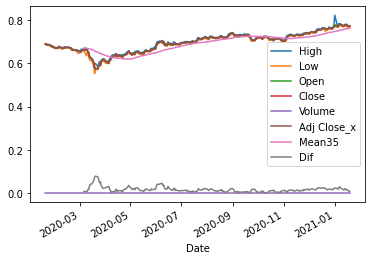

In [12]:
df_sort.plot()

In [29]:
df_sort['quantile'] = pd.qcut(df_sort['Dif'], 100, labels=False)
df_sort

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif,quantile
Date,,,,,,,,,
2020-03-20,0.597850,0.571177,0.574640,0.574290,0,0.574290,0.653364,0.079074,99
2020-03-23,0.584020,0.570210,0.575526,0.575331,0,0.575331,0.650678,0.075347,99
2020-03-19,0.596240,0.552000,0.579950,0.580980,0,0.580980,0.656123,0.075143,99
2020-03-24,0.597410,0.586889,0.587630,0.587660,0,0.587660,0.648352,0.060692,98
2020-03-18,0.602678,0.581791,0.598830,0.599220,0,0.599220,0.658815,0.059595,98
...,...,...,...,...,...,...,...,...,...
2020-04-08,0.631300,0.619660,0.623519,0.623531,0,0.623531,0.627065,0.003534,1
2020-10-12,0.720918,0.715733,0.720918,0.721188,0,0.721188,0.722592,0.001404,1
2020-09-21,0.723700,0.716590,0.722830,0.723118,0,0.723118,0.724336,0.001218,0


In [34]:
df_sorted = df_sort.sort_values(column = "Date")

TypeError: sort_values() got an unexpected keyword argument 'column'

## Add percentile

In [30]:
df_sort[df_sort['quantile']>97]

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif,quantile
Date,,,,,,,,,
2020-03-20,0.597850,0.571177,0.574640,0.574290,0,0.574290,0.653364,0.079074,99
2020-03-23,0.584020,0.570210,0.575526,0.575331,0,0.575331,0.650678,0.075347,99
2020-03-19,0.596240,0.552000,0.579950,0.580980,0,0.580980,0.656123,0.075143,99
2020-03-24,0.597410,0.586889,0.587630,0.587660,0,0.587660,0.648352,0.060692,98
2020-03-18,0.602678,0.581791,0.598830,0.599220,0,0.599220,0.658815,0.059595,98


In [31]:
df_sort[df_sort['quantile']<3]

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif,quantile
Date,,,,,,,,,
2020-10-26,0.714700,0.710470,0.713140,0.713201,0,0.713201,0.717576,0.004375,2
2020-10-05,0.720871,0.714600,0.719130,0.719321,0,0.719321,0.722934,0.003613,2
2020-04-08,0.631300,0.619660,0.623519,0.623531,0,0.623531,0.627065,0.003534,1
2020-10-12,0.720918,0.715733,0.720918,0.721188,0,0.721188,0.722592,0.001404,1
2020-09-21,0.723700,0.716590,0.722830,0.723118,0,0.723118,0.724336,0.001218,0
2020-09-08,0.728100,0.720650,0.720970,0.720940,0,0.720940,0.720798,0.000142,0
2020-10-11,0.723798,0.720620,0.722309,0.722460,0,0.722460,0.722469,0.000010,0
